# Set Environment & Libraries

In [1]:
# MPAA: Motion Picture Association of America 美国电影协会
# IMDP: Internet Movie Database

In [2]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

# Modelling
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

# Feature engineering
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

# Model support functions
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from scipy.stats import uniform
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Model evaluation
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Format
pd.set_option('display.float_format', lambda x: '%.3f' % x) # keep 3 digits after point
pd.set_option('display.max_columns',None)  # display all columns
pd.set_option('display.max_rows',None)     # display all rows, 数据过大要慎用

#  Load Data

In [4]:
# TV = pd.read_table('/Users/songyarong/Workspace/5. Project/4. Amazon_Prime_Video/TVdata.txt',header=0,sep=',',lineterminator='\n')
# TV.head()

In [5]:
df = pd.read_csv('/Users/songyarong/Workspace/5. Project/4. Amazon_Prime_Video/TVdata.txt')
df.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,import_id,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,awards,mpaa,star_category
0,385504,307127.606,1,3,lionsgate,2013,"Action,Thriller,Drama",69614,15000000,42930462,6.500,112.301,51,other award,PG-13,1.710
1,300175,270338.426,1,3,lionsgate,2013,"Comedy,Crime,Thriller",46705,15000000,3301046,6.500,94.983,41,no award,R,3.250
2,361899,256165.867,1,3,other,2012,"Crime,Drama",197596,26000000,37397291,7.300,115.764,58,other award,R,2.647
3,308314,196622.721,3,4,lionsgate,2008,"Thriller,Drama,War,Documentary,Mystery,Action",356339,15000000,15700000,7.600,130.704,94,Oscar,R,1.667
4,307201,159841.652,1,3,lionsgate,2013,"Crime,Thriller,Mystery,Documentary",46720,27220000,8551228,6.400,105.546,37,other award,R,3.067


# Data Exploration

## Exclude erroneous data

In [6]:
# Check duplicated video
if df['video_id'].duplicated().sum()==0:
    print('No duplicated video_id')

No duplicated video_id


## Understand Raw Dataset

In [7]:
# Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   video_id                       4226 non-null   int64  
 1   cvt_per_day                    4226 non-null   float64
 2   weighted_categorical_position  4226 non-null   int64  
 3   weighted_horizontal_poition    4226 non-null   int64  
 4   import_id                      4226 non-null   object 
 5   release_year                   4226 non-null   int64  
 6   genres                         4226 non-null   object 
 7   imdb_votes                     4226 non-null   int64  
 8   budget                         4226 non-null   int64  
 9   boxoffice                      4226 non-null   int64  
 10  imdb_rating                    4226 non-null   float64
 11  duration_in_mins               4226 non-null   float64
 12  metacritic_score               4226 non-null   i

In [8]:
# Check missing value
df.isnull().sum()

video_id                         0
cvt_per_day                      0
weighted_categorical_position    0
weighted_horizontal_poition      0
import_id                        0
release_year                     0
genres                           0
imdb_votes                       0
budget                           0
boxoffice                        0
imdb_rating                      0
duration_in_mins                 0
metacritic_score                 0
awards                           0
mpaa                             0
star_category                    0
dtype: int64

In [9]:
# Check unique values for each column
df.nunique()

video_id                         4226
cvt_per_day                      4226
weighted_categorical_position      37
weighted_horizontal_poition        68
import_id                           4
release_year                       97
genres                           1165
imdb_votes                       2282
budget                            253
boxoffice                         410
imdb_rating                        85
duration_in_mins                 4097
metacritic_score                   90
awards                              5
mpaa                                6
star_category                     630
dtype: int64

## Understand numerical features

### Target feature: cvt_per_day

In [10]:
# Get target variable
y = df['cvt_per_day']
y.max()
y.shape

(4226,)

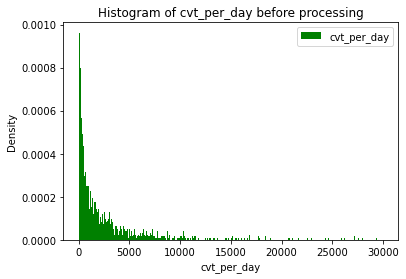

In [11]:
# Visualisation
plt.hist(y, bins=range(0,30000,30), color='g', density=True, label='cvt_per_day')
plt.title('Histogram of cvt_per_day before processing')
plt.xlabel('cvt_per_day')
plt.ylabel('Density')
plt.legend(loc='upper right')

### Numerical features

In [112]:
# Describe numerical features
to_drop = ['video_id', 'cvt_per_day', 'import_id', 'genres', 'awards', 'mpaa']
X_num = df.drop(to_drop, axis=1)
X_num.describe()

,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
count,4226.000000,4226.000000,4226.000000,4226.000000,4.226000e+03,4.226000e+03,4226.000000,4226.000000,4226.000000,4226.000000
mean,7.782537,28.103644,2001.056791,6462.924042,2.150743e+06,2.536338e+06,5.257099,89.556123,15.973734,0.954651
std,6.134183,11.863649,17.496849,31596.006790,7.176604e+06,8.243516e+06,2.122810,21.086183,26.205217,0.955045
min,1.000000,1.000000,1916.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,4.037250,0.000000,0.000000
25%,4.000000,20.000000,1998.000000,81.000000,0.000000e+00,0.000000e+00,4.300000,82.601712,0.000000,0.000000
50%,6.000000,28.000000,2008.000000,535.000000,0.000000e+00,0.000000e+00,5.800000,90.730308,0.000000,1.000000
75%,9.000000,36.000000,2012.000000,3053.000000,1.500000e+06,0.000000e+00,6.800000,99.500312,41.000000,1.666667
max,41.000000,70.000000,2017.000000,948630.000000,1.070000e+08,1.842088e+08,10.000000,246.016767,100.000000,4.000000


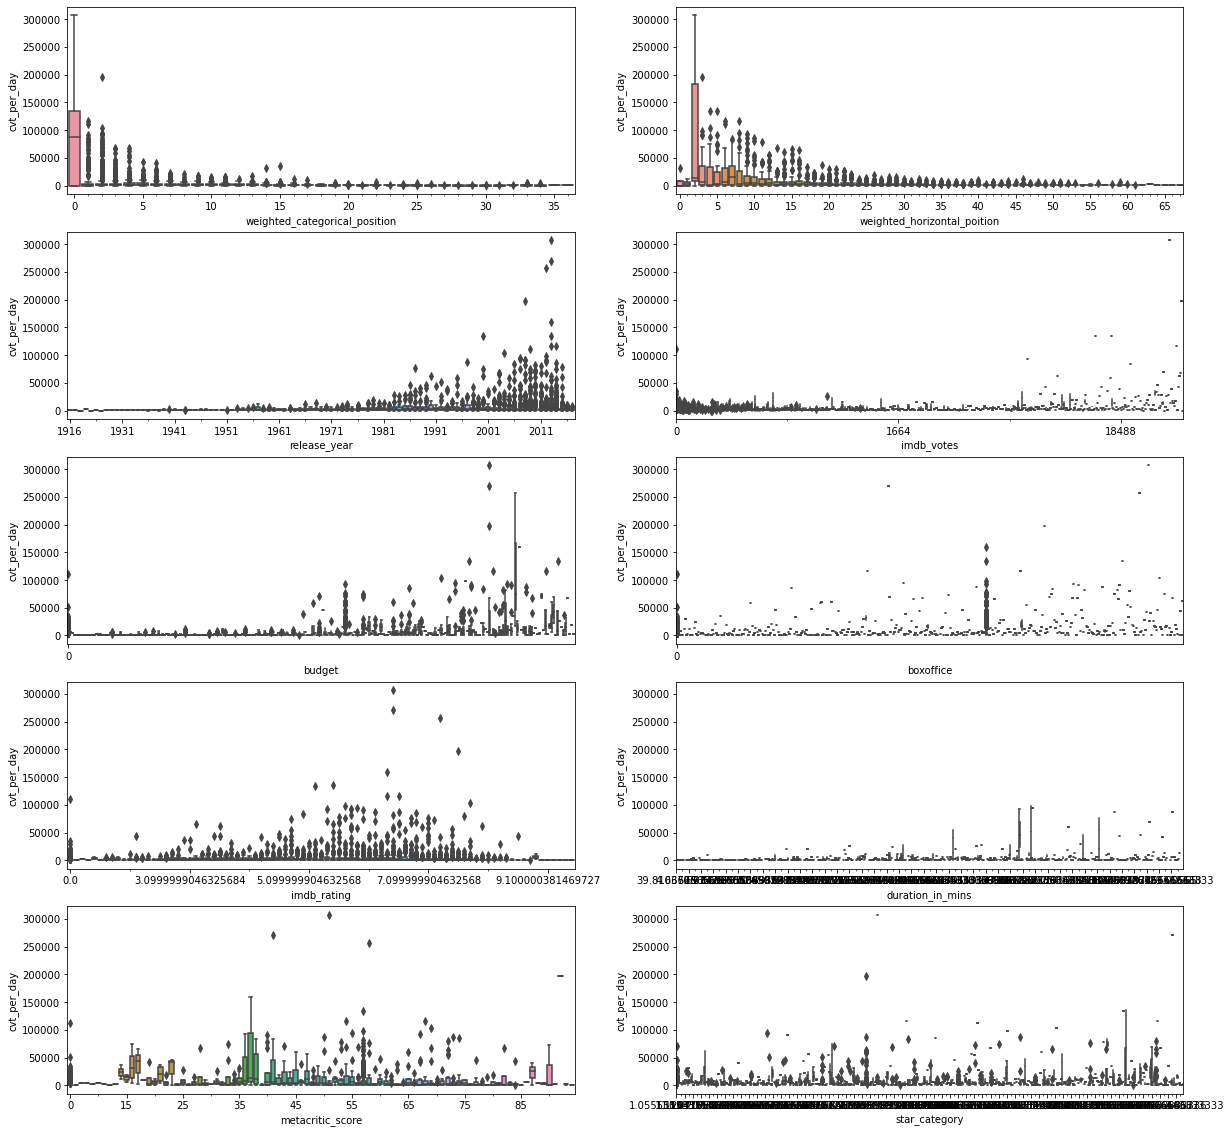

In [102]:
# Check the numeric feature distributon
# Check the outliers
# f, axs = plt.subplots(5, 2, figsize=[20, 20])
# sns.boxplot(x='weighted_categorical_position', y='cvt_per_day', data=df, ax=axs[0][0])
# axs[0][0].xaxis.set_major_locator(MultipleLocator(5))
# axs[0][0].xaxis.set_major_formatter(FormatStrFormatter('%d'))
# axs[0][0].xaxis.set_minor_locator(MultipleLocator(1))

# sns.boxplot(x='weighted_horizontal_poition', y='cvt_per_day', data=df, ax=axs[0][1])
# axs[0][1].xaxis.set_major_locator(MultipleLocator(5))
# axs[0][1].xaxis.set_major_formatter(FormatStrFormatter('%d'))
# axs[0][1].xaxis.set_minor_locator(MultipleLocator(1))

# sns.boxplot(x='release_year',  y='cvt_per_day', data=df, ax=axs[1][0])
# axs[1][0].xaxis.set_major_locator(MultipleLocator(10))
# # axs[1][0].xaxis.set_major_formatter(FormatStrFormatter('%d'))
# axs[1][0].xaxis.set_minor_locator(MultipleLocator(5))

# sns.boxplot(x='imdb_votes',  y='cvt_per_day', data=df, ax=axs[1][1])
# axs[1][1].xaxis.set_major_locator(MultipleLocator(1000))
# # axs[1][1].xaxis.set_major_formatter(FormatStrFormatter('%d'))
# axs[1][1].xaxis.set_minor_locator(MultipleLocator(500))

# sns.boxplot(x='budget', y='cvt_per_day', data=df, ax=axs[2][0])
# axs[2][0].xaxis.set_major_locator(MultipleLocator(20000))
# axs[2][0].xaxis.set_minor_locator(MultipleLocator(5000))

# sns.boxplot(x='boxoffice', y='cvt_per_day', data=df, ax=axs[2][1])
# axs[2][1].xaxis.set_major_locator(MultipleLocator(10000))
# axs[2][1].xaxis.set_minor_locator(MultipleLocator(5000))

# sns.boxplot(x='imdb_rating', y='cvt_per_day', data=df, ax=axs[3][0])
# axs[3][0].xaxis.set_major_locator(MultipleLocator(20))
# axs[3][0].xaxis.set_minor_locator(MultipleLocator(10))

# sns.boxplot(x='duration_in_mins', y='cvt_per_day', data=df, ax=axs[3][1])
# axs[3][1].xaxis.set_major_locator(MultipleLocator(100))
# axs[3][1].xaxis.set_minor_locator(MultipleLocator(50))

# sns.boxplot(x='metacritic_score', y='cvt_per_day', data=df, ax=axs[4][0])
# axs[4][0].xaxis.set_major_locator(MultipleLocator(10))
# axs[4][0].xaxis.set_minor_locator(MultipleLocator(5))

# sns.boxplot(x='star_category', y='cvt_per_day', data=df, ax=axs[4][1])
# axs[4][1].xaxis.set_major_locator(MultipleLocator(10))
# axs[4][1].xaxis.set_minor_locator(MultipleLocator(5))

<AxesSubplot:xlabel='star_category', ylabel='Count'>

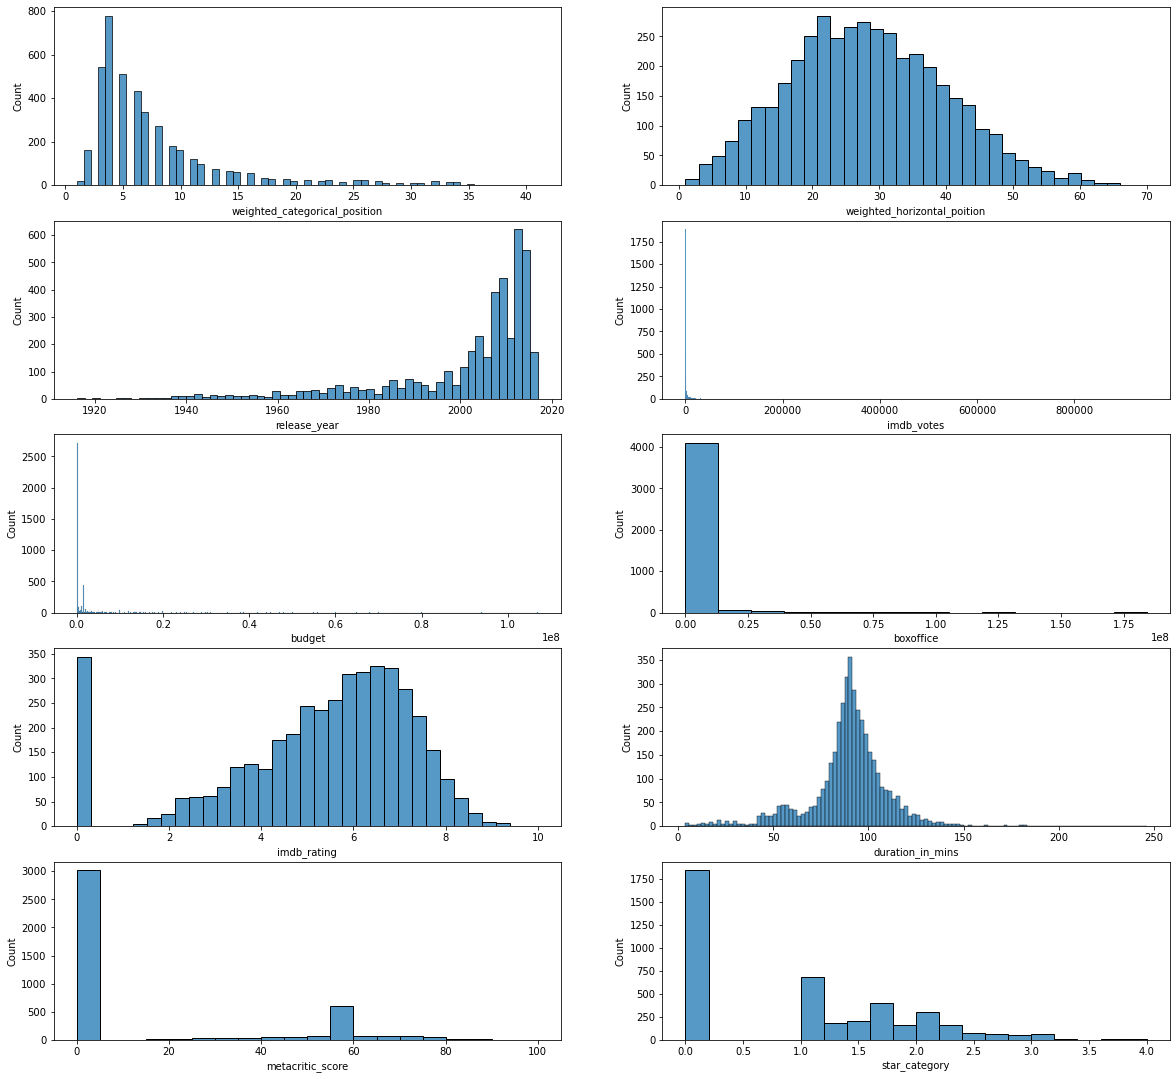

In [34]:
# Numerical feature distribution
fig,axes=plt.subplots(5,2,figsize=[20, 19])
sns.histplot(df['weighted_categorical_position'], ax=axes[0][0])
sns.histplot(df['weighted_horizontal_poition'], ax=axes[0][1])
sns.histplot(df['release_year'], ax=axes[1][0])
sns.histplot(df['imdb_votes'], ax=axes[1][1])
sns.histplot(df['budget'], ax=axes[2][0])
sns.histplot(df['boxoffice'], ax=axes[2][1])
sns.histplot(df['imdb_rating'], ax=axes[3][0])
sns.histplot(df['duration_in_mins'], ax=axes[3][1])
sns.histplot(df['metacritic_score'], ax=axes[4][0])
sns.histplot(df['star_category'], ax=axes[4][1])

<AxesSubplot:>

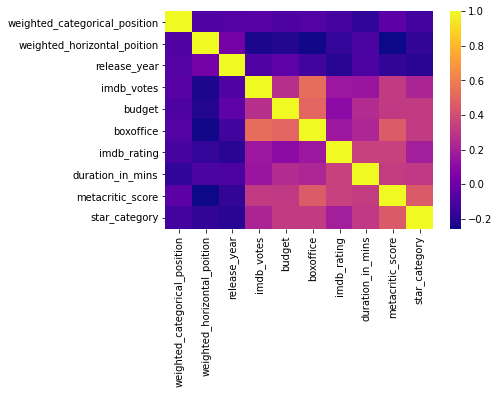

In [113]:
# Feature correlation
corr = X_num.corr()
sns.heatmap(corr, cmap='plasma')

In [114]:
corr

,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
weighted_categorical_position,1.000000,-0.084066,-0.068902,-0.063700,-0.089899,-0.073628,-0.116443,-0.174461,-0.044317,-0.122851
weighted_horizontal_poition,-0.084066,1.000000,0.026634,-0.220749,-0.211356,-0.244709,-0.162021,-0.102344,-0.255015,-0.167801
release_year,-0.068902,0.026634,1.000000,-0.082661,-0.040121,-0.128091,-0.198856,-0.096811,-0.167038,-0.198454
imdb_votes,-0.063700,-0.220749,-0.082661,1.000000,0.272852,0.531467,0.163264,0.155670,0.321860,0.225192
budget,-0.089899,-0.211356,-0.040121,0.272852,1.000000,0.504618,0.105671,0.251342,0.314608,0.321721
boxoffice,-0.073628,-0.244709,-0.128091,0.531467,0.504618,1.000000,0.163673,0.226184,0.464965,0.322329
imdb_rating,-0.116443,-0.162021,-0.198856,0.163264,0.105671,0.163673,1.000000,0.344055,0.346935,0.191768
duration_in_mins,-0.174461,-0.102344,-0.096811,0.155670,0.251342,0.226184,0.344055,1.000000,0.327050,0.309110
metacritic_score,-0.044317,-0.255015,-0.167038,0.321860,0.314608,0.464965,0.346935,0.327050,1.000000,0.452445
star_category,-0.122851,-0.167801,-0.198454,0.225192,0.321721,0.322329,0.191768,0.309110,0.452445,1.000000


### Categorical features

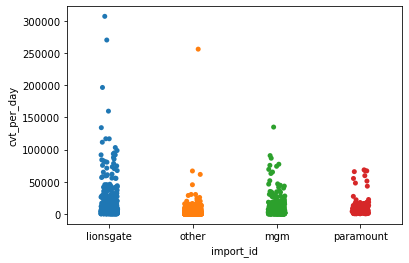

other        2963
lionsgate     677
mgm           445
paramount     141
Name: import_id, dtype: int64


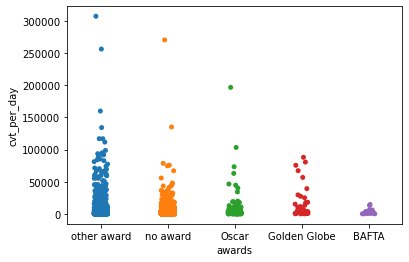

no award        2569
other award     1453
Oscar            141
Golden Globe      44
BAFTA             19
Name: awards, dtype: int64


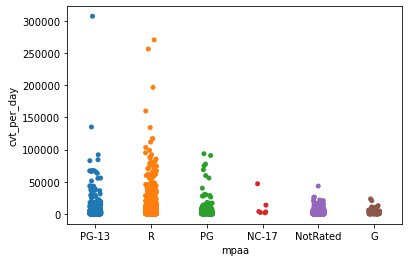

NotRated    2158
R           1158
PG-13        426
PG           353
G            125
NC-17          6
Name: mpaa, dtype: int64


In [39]:
# 'import_id', 'awards', 'mpaa'
# Strip plot: a scatterplot where one variable is categorical

sns.stripplot(x='import_id', y='cvt_per_day', data=df, jitter=True)
plt.show()
print(df['import_id'].value_counts())

sns.stripplot(x='awards', y='cvt_per_day', data=df, jitter=True)
plt.show()
print(df['awards'].value_counts())

sns.stripplot(x='mpaa', y='cvt_per_day', data=df, jitter=True)
plt.show()
print(df['mpaa'].value_counts())

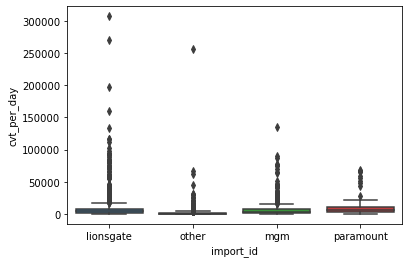

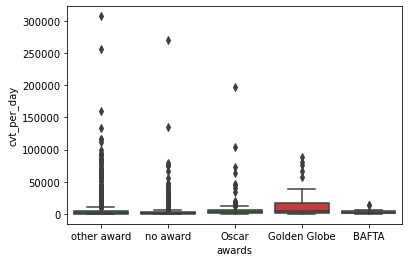

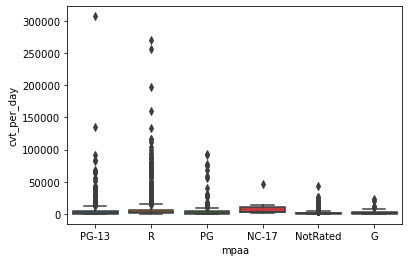

In [41]:
# Boxplot: more statistical information

sns.boxplot(x='import_id', y='cvt_per_day', data=df)
plt.show()

sns.boxplot(x='awards', y='cvt_per_day', data=df)
plt.show()

sns.boxplot(x='mpaa', y='cvt_per_day', data=df)
plt.show()

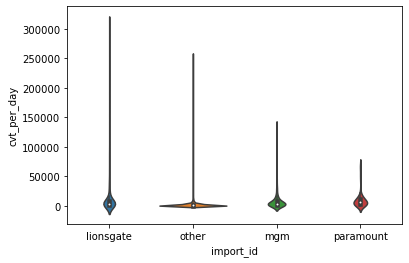

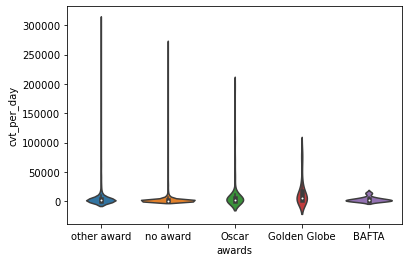

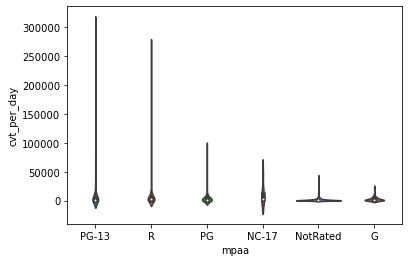

In [40]:
# Violinplot
sns.violinplot(x='import_id', y='cvt_per_day', data=df)
plt.show()

sns.violinplot(x='awards', y='cvt_per_day', data=df)
plt.show()

sns.violinplot(x='mpaa', y='cvt_per_day', data=df)
plt.show()

In [116]:
# 'genres'
# Some movies belong to more than one genre

# Split the genre of each video
gen_split = df['genres'].str.get_dummies(sep=',').sum()
gen_split.sort_values(ascending=False)

Drama                    1677
Comedy                   1184
Thriller                  879
Horror                    762
Action                    739
Documentary               671
Romance                   591
Crime                     437
Independent               393
Mystery                   375
Adventure                 363
Sci-Fi                    363
Kids & Family             280
Fantasy                   243
Music                     171
Animation                 129
War                       102
Western                   102
Sport                      77
Musicals                   68
Foreign/International      64
Anime                      11
Reality                     9
Lifestyle                   7
Adult                       3
LGBT                        2
Holiday                     1
dtype: int64

In [117]:
gen_split.shape

(27,)

# Feature Scaling

## Categorical feature

### Convert 'import_id', 'awards', 'mpaa'

In [118]:
# pd.get_dummies
d_import_id = pd.get_dummies(df['import_id']).astype(np.int64)
d_awards = pd.get_dummies(df['awards']).astype(np.int64)
d_mpaa = pd.get_dummies(df['mpaa']).astype(np.int64)

### Convert 'genres' 

In [119]:
# Split the str first into seperate string, then get_dummies
d_genres = df['genres'].str.get_dummies(sep=',').astype(np.int64)

# Comebine the least frequent 6 genres
d_genres['Misc_genres']=d_genres['Anime']|d_genres['Reality']|d_genres['Lifestyle']|d_genres['Adult']|d_genres['LGBT']|d_genres['Holiday']
d_genres.drop(['Anime', 'Reality', 'Lifestyle', 'Adult', 'LGBT', 'Holiday'], inplace=True, axis=1)
d_genres.shape

(4226, 22)

### Bin and Convert 'release_year'

In [120]:
df['release_year'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

0.1    1974.0
0.2    1991.0
0.3    2001.0
0.4    2006.0
0.5    2008.0
0.6    2010.0
0.7    2012.0
0.8    2013.0
0.9    2014.0
Name: release_year, dtype: float64

In [121]:
# bin/categorize release-year into 10 bins(categories)
# convert the bin column into dummies
bin_year = [1916, 1974, 1991, 2001, 2006, 2008, 2010, 2012, 2013, 2014, 2017]
year_range = ['1916-1974', '1974-1991', '1991-2001', '2001-2006','2006-2008','2008-2010','2010-2012','2012-2013',
              '2013-2014','2014-2017']

year_bin = pd.cut(df['release_year'], bin_year, labels=year_range)
d_year = pd.get_dummies(year_bin).astype(np.int64)
d_year

,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
4221,0,0,0,0,0,1,0,0,0,0
4222,0,0,0,0,0,0,0,1,0,0
4223,0,0,0,0,1,0,0,0,0,0
4224,0,0,0,1,0,0,0,0,0,0


In [122]:
X_num.drop(['release_year'], inplace=True, axis=1)
X = pd.concat([X_num, d_genres, d_awards, d_mpaa, d_year], axis=1)
X

,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category,Action,...,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
0,1,3,69614,15000000,42930462,6.5,112.301017,51,1.710000,1,...,0,0,0,0,0,0,0,1,0,0
1,1,3,46705,15000000,3301046,6.5,94.983250,41,3.250000,0,...,0,0,0,0,0,0,0,1,0,0
2,1,3,197596,26000000,37397291,7.3,115.763675,58,2.646667,0,...,0,0,0,0,0,0,1,0,0,0
3,3,4,356339,15000000,15700000,7.6,130.703583,94,1.666667,1,...,0,0,0,0,1,0,0,0,0,0
4,1,3,46720,27220000,8551228,6.4,105.545533,37,3.066667,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4221,3,32,14,0,0,7.8,4.311600,0,1.700000,0,...,0,0,0,0,0,1,0,0,0,0
4222,29,35,0,0,0,0.0,4.878900,0,0.000000,0,...,0,0,0,0,0,0,0,1,0,0
4223,3,27,505,0,0,7.1,110.350000,0,0.000000,0,...,0,0,0,0,1,0,0,0,0,0
4224,4,15,5,100000,0,6.0,79.633333,0,0.000000,0,...,0,0,0,1,0,0,0,0,0,0


## Missing data

In [123]:
# There is no NULL value in the original dataset
# Among the 10 numerical features
# 4 features have over 25% of missing values 
# (shown as '0', which is not possible in reality): budget, boxoffice, metacritic_score, star_category. 
# 2 features have less than 10% of missing data: imdb_votes, imdb_rating

# Attention! 0 can be a good candidate for missing date!
X[['budget','boxoffice','metacritic_score', 'star_category','imdb_votes', 'imdb_rating']] = X[['budget','boxoffice','metacritic_score', 'star_category','imdb_votes', 'imdb_rating']].replace(0, np.nan)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   weighted_categorical_position  4226 non-null   int64  
 1   weighted_horizontal_poition    4226 non-null   int64  
 2   imdb_votes                     3882 non-null   float64
 3   budget                         1772 non-null   float64
 4   boxoffice                      1032 non-null   float64
 5   imdb_rating                    3882 non-null   float64
 6   duration_in_mins               4226 non-null   float64
 7   metacritic_score               1214 non-null   float64
 8   star_category                  2380 non-null   float64
 9   Action                         4226 non-null   int64  
 10  Adventure                      4226 non-null   int64  
 11  Animation                      4226 non-null   int64  
 12  Comedy                         4226 non-null   i

In [22]:
X.isnull().sum()

weighted_categorical_position       0
weighted_horizontal_poition         0
imdb_votes                        344
budget                           2454
boxoffice                        3194
imdb_rating                       344
duration_in_mins                    0
metacritic_score                 3012
star_category                    1846
Action                              0
Adventure                           0
Animation                           0
Comedy                              0
Crime                               0
Documentary                         0
Drama                               0
Fantasy                             0
Foreign/International               0
Horror                              0
Independent                         0
Kids & Family                       0
Music                               0
Musicals                            0
Mystery                             0
Romance                             0
Sci-Fi                              0
Sport       

In [124]:
# Filling missing value with mean
X_2 = X.copy()
X_2['imdb_votes']=X_2['imdb_votes'].fillna(X_2['imdb_votes'].mean())
X_2['budget']=X_2['budget'].fillna(X_2['budget'].mean())
X_2['boxoffice']=X_2['boxoffice'].fillna(X_2['boxoffice'].mean())
X_2['imdb_rating']=X_2['imdb_rating'].fillna(X_2['imdb_rating'].mean())
X_2['metacritic_score']=X_2['metacritic_score'].fillna(X_2['metacritic_score'].mean())
X_2['star_category']=X_2['star_category'].fillna(X_2['star_category'].mean())
X_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   weighted_categorical_position  4226 non-null   int64  
 1   weighted_horizontal_poition    4226 non-null   int64  
 2   imdb_votes                     4226 non-null   float64
 3   budget                         4226 non-null   float64
 4   boxoffice                      4226 non-null   float64
 5   imdb_rating                    4226 non-null   float64
 6   duration_in_mins               4226 non-null   float64
 7   metacritic_score               4226 non-null   float64
 8   star_category                  4226 non-null   float64
 9   Action                         4226 non-null   int64  
 10  Adventure                      4226 non-null   int64  
 11  Animation                      4226 non-null   int64  
 12  Comedy                         4226 non-null   i

## Feature Scaling

In [125]:
scaler = StandardScaler()
num_cols = ['weighted_categorical_position', 'weighted_horizontal_poition', 'budget','boxoffice', 
             'imdb_votes','imdb_rating','duration_in_mins', 'metacritic_score','star_category']
X_sc = X_2.copy()
scaler.fit(X_sc[num_cols])
X_sc[num_cols] = scaler.transform(X_sc[num_cols])
X_sc

,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category,Action,...,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
0,-1.105826,-2.116264,1.984496e+00,1.470049,4.695913e+00,0.541892,1.078791,-0.629733,3.289160e-02,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.105826,-2.116264,1.258002e+00,1.470049,-1.022340e+00,0.541892,0.257409,-1.997101,3.434028e+00,0,...,0,0,0,0,0,0,0,1,0,0
2,-1.105826,-2.116264,6.043083e+00,3.108277,3.897514e+00,1.099791,1.243025,0.327425,2.101548e+00,0,...,0,0,0,0,0,0,1,0,0,0
3,-0.779746,-2.031963,1.107717e+01,1.470049,7.667438e-01,1.309003,1.951625,5.249951,-6.281137e-02,1,...,0,0,0,0,1,0,0,0,0,0
4,-1.105826,-2.116264,1.258478e+00,3.289972,-2.647750e-01,0.472155,0.758378,-2.544049,3.029131e+00,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4221,-0.779746,0.328467,-2.226711e-01,0.000000,2.687669e-16,1.448478,-4.043151,0.000000,1.080630e-02,0,...,0,0,0,0,0,1,0,0,0,0
4222,3.459299,0.581370,-2.884205e-17,0.000000,2.687669e-16,0.000000,-4.016243,0.000000,-5.394314e-15,0,...,0,0,0,0,0,0,0,1,0,0
4223,-0.779746,-0.093038,-2.071005e-01,0.000000,2.687669e-16,0.960316,0.986254,0.000000,-5.394314e-15,0,...,0,0,0,0,1,0,0,0,0,0
4224,-0.616705,-1.104651,-2.229566e-01,-0.749006,2.687669e-16,0.193206,-0.470638,0.000000,-5.394314e-15,0,...,0,0,0,1,0,0,0,0,0,0


# Model Training

## Train_test_split

In [126]:
# Strayify sampling
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_sc, y, test_size=0.15, random_state=3)

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('testing data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')


training data has 3592 observation with 52 features
testing data has 634 observation with 52 features


## General rough modelling 

In [127]:
# Logistic Regression
regressor_linear = LinearRegression()

# K Nearest Neighbors
regressor_KNN = KNeighborsRegressor()

# Random Forest
regressor_RF = RandomForestRegressor(random_state=2, max_features='sqrt')

In [128]:
# Use 5-fold Cross Validation to roughly compare the accuracy for different models
models = ['LinearRegression', 'KNN', 'Random Forest']
model_list = [regressor_linear, regressor_KNN, regressor_RF]
count = 0

for regressor in model_list:
    cv_score = model_selection.cross_val_score(regressor, X_train, y_train, cv=5)
    print(cv_score)
    print('Model accuracy of ' + models[count] + ' is ' + str(cv_score.mean()))
    count += 1

[ 2.84578314e-01  2.82781252e-01  2.22529472e-01 -7.00953128e+18
  1.60211589e-01]
Model accuracy of LinearRegression is -1.4019062563896284e+18
[0.16513583 0.23452842 0.24532112 0.36800918 0.2017563 ]
Model accuracy of KNN is 0.24295017173922764
[0.27758681 0.56487593 0.41928641 0.64081841 0.10469142]
Model accuracy of Random Forest is 0.40145179655694124


## Use Grid Search to Find Optimal Hyperparameters

### UDF: Helper function for printing out grid search results

In [129]:
# Helper function for printing out grid search results
def print_grid_search_metrics(gs):
    print("Best score: " + str(gs.best_score_))        # best_score_
    print("Best parameter set:")
    best_parameters = gs.best_params_                  # best_parameters
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

### Find Optimal Hyperparameters - KNN

In [130]:
# Choose k
parameters = {'n_neighbors':[1,5,10,15,20]}
Grid_KNN = GridSearchCV(KNeighborsRegressor(), parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 5, 10, 15, 20]})

In [131]:
# Best number of neighbors
print_grid_search_metrics(Grid_KNN)

Best score: 0.3210420139653027
Best parameter set:
n_neighbors:10


In [132]:
# Best KNN
best_KNN_model = Grid_KNN.best_estimator_
best_KNN_model

KNeighborsRegressor(n_neighbors=10)

In [133]:
KNN_models = pd.DataFrame(Grid_KNN.cv_results_)      # cv_results
KNN_models

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009896,0.006237,0.075723,0.009714,1,{'n_neighbors': 1},-0.339699,-0.943176,-0.077781,0.006259,-0.301241,-0.331128,0.332741,5
1,0.006875,0.000748,0.079684,0.000836,5,{'n_neighbors': 5},0.165136,0.234528,0.245321,0.368009,0.201756,0.242950,0.068510,4
2,0.007157,0.000670,0.083587,0.000929,10,{'n_neighbors': 10},0.398730,0.326311,0.228962,0.384141,0.267066,0.321042,0.065478,1
3,0.006936,0.000669,0.085350,0.000676,15,{'n_neighbors': 15},0.343399,0.325656,0.231523,0.390073,0.282133,0.314557,0.054044,2
4,0.006703,0.000626,0.086087,0.000747,20,{'n_neighbors': 20},0.342916,0.314910,0.212319,0.342406,0.261791,0.294869,0.050751,3


### Find Optimal Hyperparameters -Random Forest

In [134]:
# Choose the number of trees
parameters = {'n_estimators':[55,56,57,58,59,60,61], 'max_depth':[17,18,19,20,21]}
Grid_RF = GridSearchCV(RandomForestRegressor(), parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [17, 18, 19, 20, 21],
                         'n_estimators': [55, 56, 57, 58, 59, 60, 61]})

In [135]:
# Best number of trees and max-depth
print_grid_search_metrics(Grid_RF)

Best score: 0.4231645896276769
Best parameter set:
max_depth:18
n_estimators:61


In [136]:
RF_models = pd.DataFrame(Grid_RF.cv_results_)      # cv_results
RF_models

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.758242,0.016769,0.007256,0.000116,17,55,"{'max_depth': 17, 'n_estimators': 55}",0.315287,0.536920,0.428255,0.603086,0.037456,0.384201,0.199076,25
1,0.765852,0.009196,0.007302,0.000102,17,56,"{'max_depth': 17, 'n_estimators': 56}",0.329956,0.530536,0.382792,0.636026,0.075747,0.391012,0.191147,18
2,0.775119,0.002598,0.007697,0.000409,17,57,"{'max_depth': 17, 'n_estimators': 57}",0.285903,0.542515,0.410387,0.626485,0.156533,0.404364,0.169654,9
3,0.789489,0.003311,0.007516,0.000067,17,58,"{'max_depth': 17, 'n_estimators': 58}",0.304529,0.519620,0.365154,0.649482,0.068834,0.381524,0.197405,29
4,0.805577,0.002687,0.007766,0.000154,17,59,"{'max_depth': 17, 'n_estimators': 59}",0.269694,0.548317,0.421614,0.614724,0.050631,0.380996,0.202881,30
5,0.840373,0.016651,0.008217,0.000745,17,60,"{'max_depth': 17, 'n_estimators': 60}",0.305710,0.578011,0.400953,0.649880,0.097890,0.406489,0.197017,7
6,0.856039,0.025303,0.008335,0.000579,17,61,"{'max_depth': 17, 'n_estimators': 61}",0.270622,0.509580,0.414689,0.628575,0.146637,0.394021,0.170424,14
7,0.779851,0.010205,0.007540,0.000167,18,55,"{'max_depth': 18, 'n_estimators': 55}",0.235626,0.538488,0.371659,0.626897,0.089542,0.372442,0.195484,33
8,0.796424,0.010749,0.007621,0.000087,18,56,"{'max_depth': 18, 'n_estimators': 56}",0.317359,0.559189,0.414309,0.662145,-0.048114,0.380978,0.244987,31
9,0.808383,0.006114,0.008048,0.000731,18,57,"{'max_depth': 18, 'n_estimators': 57}",0.280380,0.552904,0.402472,0.623190,0.050806,0.381950,0.203871,27


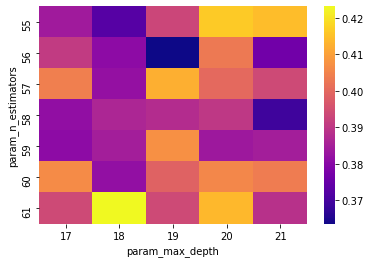

In [137]:
res = RF_models.pivot(index='param_n_estimators', columns='param_max_depth', values='mean_test_score')
_ = sns.heatmap(res, cmap='plasma')

In [138]:
# Best random forest
best_RF_model = Grid_RF.best_estimator_
best_RF_model

RandomForestRegressor(max_depth=18, n_estimators=61)

### Find Optimal Hyperparameters - Linear Regression

#### Lasso

In [139]:
# Select alpha
X_train_, X_validate, y_train_, y_validate = model_selection.train_test_split(X_train, y_train, test_size=0.15, random_state=0)

alphas = np.linspace(1, 201, num=500)
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    lasso = Lasso()
    lasso.set_params(alpha = a)
    lasso.fit(X_train_, y_train_)
    scores[i] = lasso.score(X_validate, y_validate)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a

print('The optimized alpha and score of Lasso is: ' + str(opt_a) + ' ' + str(max_score))

The optimized alpha and score of Lasso is: 145.68937875751504 0.34269106366093083


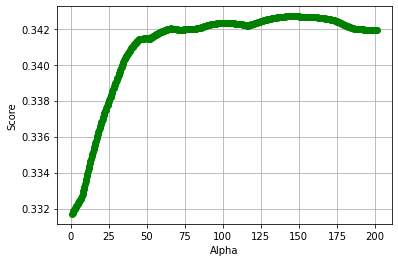

In [140]:
# Visualisation alpha vs score
plt.plot(alphas, scores, color='g', linestyle='dashed', marker='o')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [141]:
# combine the validate and training data, use the optimal alpha to train the model
best_Lasso_model = Lasso()
best_Lasso_model.set_params(alpha=opt_a)
best_Lasso_model.fit(X_train, y_train)

Lasso(alpha=145.68937875751504)

#### Ridge

In [142]:
# Select alpha
X_train_, X_validate, y_train_, y_validate = model_selection.train_test_split(X_train, y_train, test_size=0.15, random_state=0)

alphas = np.linspace(1, 201, num=500)
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    ridge = Ridge()
    ridge.set_params(alpha = a)
    ridge.fit(X_train_, y_train_)
    scores[i] = ridge.score(X_validate, y_validate)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a

print('The optimized alpha and score of Ridge is: ' + str(opt_a) + ' ' + str(max_score))

The optimized alpha and score of Ridge is: 124.44689378757515 0.33676582062571925


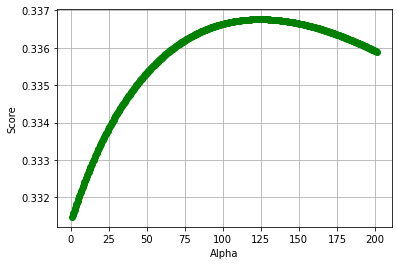

In [143]:
# Visualisation alpha vs score
plt.plot(alphas, scores, color='g', linestyle='dashed', marker='o')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [144]:
# combine the validate and training data, use the optimal alpha to train the model
best_Ridge_model = Ridge()
best_Ridge_model.set_params(alpha=opt_a)
best_Ridge_model.fit(X_train, y_train)

Ridge(alpha=124.44689378757515)

## Model Evaluation

### Evaluate KNN, RF, Lasso, Ridge

In [145]:
# KNN
best_KNN_model.fit(X_train, y_train)
KNN_predict = best_KNN_model.predict(X_test)

KNN_score = best_KNN_model.score(X_test, y_test)
print('KNN score:', KNN_score)

KNN_MSE = mean_squared_error(y_test, KNN_predict)
print('KNN MSE:', KNN_MSE)

KNN_RMSE = np.sqrt(KNN_MSE)
print('KNN RMSE:', KNN_RMSE)

KNN score: 0.227793181746189
KNN MSE: 204921022.68773907
KNN RMSE: 14315.06279021294


In [146]:
# RF
best_RF_model.fit(X_train, y_train)
RF_predict = best_RF_model.predict(X_test)

RF_score = best_RF_model.score(X_test, y_test)
print('RF score:', RF_score)

RF_MSE = mean_squared_error(y_test, RF_predict)
print('RF MSE:', RF_MSE)

RF_RMSE = np.sqrt(RF_MSE)
print('RF RMSE:', RF_RMSE)

RF score: 0.4356153025611905
RF MSE: 149771132.10422012
RF RMSE: 12238.101654432363


In [147]:
# Lasso
best_Lasso_model.fit(X_train, y_train)
Lasso_predict = best_Lasso_model.predict(X_test)

Lasso_score = best_Lasso_model.score(X_test, y_test)
print('Lasso score:', Lasso_score)

Lasso_MSE = mean_squared_error(y_test, Lasso_predict)
print('Lasso MSE:', Lasso_MSE)

Lasso_RMSE = np.sqrt(Lasso_MSE)
print('Lasso RMSE:', Lasso_RMSE)

Lasso score: 0.057440922717884035
Lasso MSE: 250127511.81999764
Lasso RMSE: 15815.420064607757


In [148]:
# Ridge
best_Ridge_model.fit(X_train, y_train)
Ridge_predict = best_Ridge_model.predict(X_test)

Ridge_score = best_Ridge_model.score(X_test, y_test)
print('Ridge score:', Ridge_score)

Ridge_MSE = mean_squared_error(y_test, Ridge_predict)
print('Ridge MSE:', Ridge_MSE)

Ridge_RMSE = np.sqrt(Ridge_MSE)
print('Ridge RMSE:', Ridge_RMSE)

Ridge score: 0.07444096649159782
Ridge MSE: 245616199.21112514
Ridge RMSE: 15672.147243154817


### Model Comparison

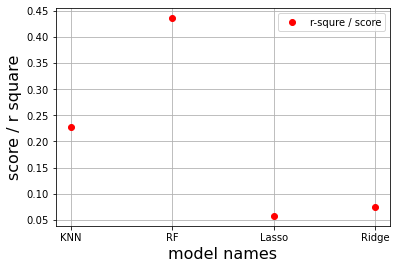

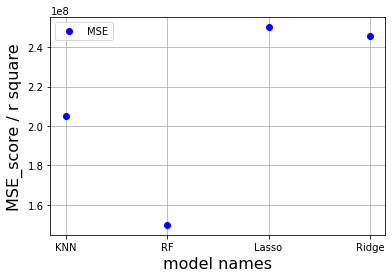

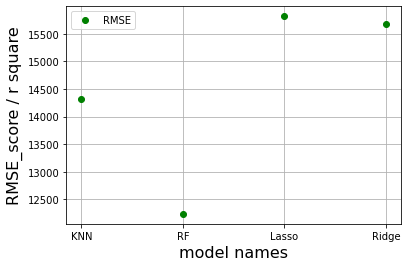

In [149]:
model = ['KNN', 'RF', 'Lasso', 'Ridge']
lst_score = [KNN_score, RF_score, Lasso_score, Ridge_score]
MSE_score = [KNN_MSE, RF_MSE, Lasso_MSE, Ridge_MSE]
RMSE_score = [KNN_RMSE, RF_RMSE, Lasso_RMSE, Ridge_RMSE]

plt.figure(1)
plt.plot(model, lst_score, 'ro')
plt.legend(['r-squre / score'])
plt.xlabel('model names',fontsize =16)
plt.ylabel('score / r square', fontsize =16)
plt.grid(True)
plt.show()

plt.figure(2)
plt.plot(model, MSE_score, 'bo')
plt.legend(['MSE'])
plt.xlabel('model names',fontsize =16)
plt.ylabel('MSE_score / r square', fontsize =16)
plt.grid(True)
plt.show()

plt.figure(3)
plt.plot(model, RMSE_score, 'go')
plt.legend(['RMSE'])
plt.xlabel('model names',fontsize =16)
plt.ylabel('RMSE_score / r square', fontsize =16)
plt.grid(True)
plt.show()

## Feature Importance

In [150]:
# check feature importance of random forest for feature selection
importances = best_RF_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_name = X_train.columns.values

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X_train.shape[1]):
    print ("{0} : {1}".format(X_train.columns[indices[ind]],round(importances[indices[ind]], 4)))
    

Feature importance ranking by Random Forest Model:
weighted_categorical_position : 0.2955
imdb_votes : 0.2119
weighted_horizontal_poition : 0.1081
star_category : 0.0772
metacritic_score : 0.0479
imdb_rating : 0.0368
boxoffice : 0.0309
duration_in_mins : 0.0288
budget : 0.0287
Crime : 0.0168
Thriller : 0.0116
2001-2006 : 0.0088
2012-2013 : 0.0078
2006-2008 : 0.0056
Fantasy : 0.005
Kids & Family : 0.0045
Documentary : 0.0043
1974-1991 : 0.0042
Western : 0.0042
R : 0.0042
other award : 0.0037
no award : 0.0036
Sci-Fi : 0.0036
2010-2012 : 0.0035
2008-2010 : 0.0032
NotRated : 0.0032
Comedy : 0.0032
Horror : 0.0031
PG : 0.003
Animation : 0.0029
2013-2014 : 0.0029
Action : 0.0025
Drama : 0.0023
Golden Globe : 0.0021
PG-13 : 0.0021
Romance : 0.0018
Music : 0.0016
1991-2001 : 0.0016
Oscar : 0.0013
Mystery : 0.0012
Adventure : 0.0011
Sport : 0.001
2014-2017 : 0.0009
War : 0.0005
1916-1974 : 0.0003
Musicals : 0.0003
Independent : 0.0003
G : 0.0002
Misc_genres : 0.0001
NC-17 : 0.0001
Foreign/Inte

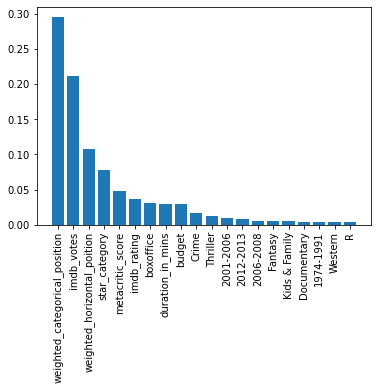

In [151]:
plt.figure(1)
plt.bar(feature_name[indices[:20]], importances[indices[:20]])
plt.xticks(rotation=90)
plt.show()

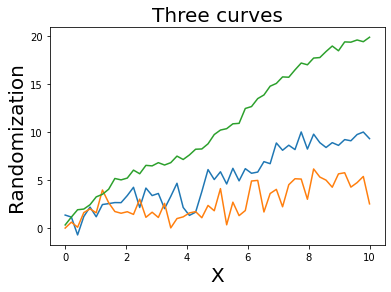

In [9]:
x=np.linspace(0,10,50)
np.random.seed(10)
fig,ax0=plt.subplots(nrows=1)
ax0.plot(x,np.sin(x)+x+np.random.randn(50))
ax0.plot(x,np.sin(x)+0.5*x+np.random.randn(50))
ax0.plot(x,np.sin(x)+2*x+np.random.rand(50))
ax0.set_title("Three curves",fontsize=20)

ax0.set_xlabel('X')
ax0.set_ylabel('Randomization')

ax0.xaxis.label.set_size(20) 
ax0.yaxis.label.set_size(20)

ax0.set_xticks(np.arange(min(x),max(x)+1,2))

plt.show()